<a href="https://colab.research.google.com/github/HaniRawat/DAA-LAB/blob/main/naive_vs_kmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import matplotlib.pyplot as plt


In [2]:
def naive_search(pattern, text):
    m = len(pattern)
    n = len(text)
    occurrences = []

    for i in range(n - m + 1):
        j = 0
        while j < m and text[i + j] == pattern[j]:
            j += 1
        if j == m:
            occurrences.append(i)

    return occurrences

In [3]:

def compute_lps_array(pattern):
    m = len(pattern)
    lps = [0] * m
    length = 0
    i = 1

    while i < m:
        if pattern[i] == pattern[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length - 1]
            else:
                lps[i] = 0
                i += 1

    return lps

def kmp_search(pattern, text):
    m = len(pattern)
    n = len(text)
    lps = compute_lps_array(pattern)
    i = 0  # index for text[]
    j = 0  # index for pattern[]
    occurrences = []

    while i < n:
        if pattern[j] == text[i]:
            i += 1
            j += 1

        if j == m:
            occurrences.append(i - j)
            j = lps[j - 1]
        elif i < n and pattern[j] != text[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1

    return occurrences

In [4]:
text_sizes = [1000, 5000, 10000, 50000, 100000]
naive_times = []
kmp_times = []


In [6]:
pattern = "abc"
for size in text_sizes:
    text = "a" * (size - 3) + "abc"  # Create a large text with pattern at the end

    # Measure time for Naive Search
    start_time = time.time()
    naive_search(pattern, text)
    naive_times.append(time.time() - start_time)

    # Measure time for KMP Search
    start_time = time.time()
    kmp_search(pattern, text)
    kmp_times.append(time.time() - start_time)

In [7]:
naive_times

[0.0006036758422851562,
 0.004065275192260742,
 0.006003618240356445,
 0.02985978126525879,
 0.06153130531311035]

In [8]:
kmp_times

[0.0006048679351806641,
 0.003137350082397461,
 0.006192207336425781,
 0.031054019927978516,
 0.06643009185791016]

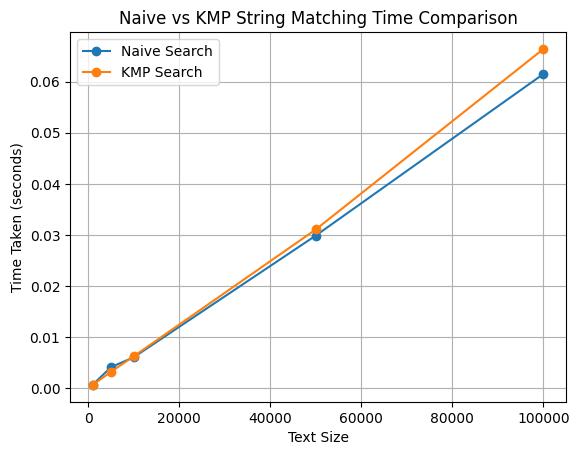

In [9]:
plt.plot(text_sizes, naive_times, marker='o', label="Naive Search")
plt.plot(text_sizes, kmp_times, marker='o', label="KMP Search")
plt.xlabel("Text Size")
plt.ylabel("Time Taken (seconds)")
plt.title("Naive vs KMP String Matching Time Comparison")
plt.legend()
plt.grid(True)
plt.show()